In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank.csv" , sep=";")
data = data.copy()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
data.drop(["balance"] , axis = 1 , inplace=True)

In [4]:
data = data.rename(columns = {"age" : "Yaş" , "job" : "İş" , "marital" : "Medeni Durum",
                              "education": "Öğrenim Durumu" , "default": "kredi durumu" , "housing": "Konut kredisi",
                              "loan": "Kişisel kredi" , "contact": "iletişim" , "day": "İletişim günü" ,
                              "month": "Son iletişim ayı" , "duration": "Geçen Konuşma Süresi" , "campaign": "Kampanya",
                              "pdays" : "Aradan geçen iletişim süresi" , "previous": "Müşteri ile Gerçekleşen İletişim Sayısı",
                              "poutcome": "Kampanya Sonucu" , "y": "Abonelik Durumu"})

In [5]:
data.head()

,Yaş,İş,Medeni Durum,Öğrenim Durumu,kredi durumu,Konut kredisi,Kişisel kredi,iletişim,İletişim günü,Son iletişim ayı,Geçen Konuşma Süresi,Kampanya,Aradan geçen iletişim süresi,Müşteri ile Gerçekleşen İletişim Sayısı,Kampanya Sonucu,Abonelik Durumu
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data.shape

(4521, 16)

In [7]:
data.isna().sum()

Yaş                                        0
İş                                         0
Medeni Durum                               0
Öğrenim Durumu                             0
kredi durumu                               0
Konut kredisi                              0
Kişisel kredi                              0
iletişim                                   0
İletişim günü                              0
Son iletişim ayı                           0
Geçen Konuşma Süresi                       0
Kampanya                                   0
Aradan geçen iletişim süresi               0
Müşteri ile Gerçekleşen İletişim Sayısı    0
Kampanya Sonucu                            0
Abonelik Durumu                            0
dtype: int64

In [8]:
data["İş"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: İş, dtype: int64

In [9]:
data["Abonelik Durumu"].value_counts()

no     4000
yes     521
Name: Abonelik Durumu, dtype: int64

In [10]:
data["Medeni Durum"].value_counts()

married     2797
single      1196
divorced     528
Name: Medeni Durum, dtype: int64

### Görselleştirme

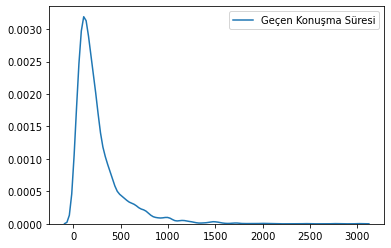

In [11]:
sns.kdeplot(data["Geçen Konuşma Süresi"])

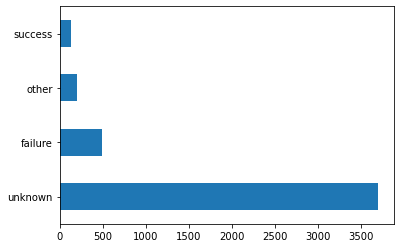

In [12]:
data["Kampanya Sonucu"].value_counts().plot.barh();

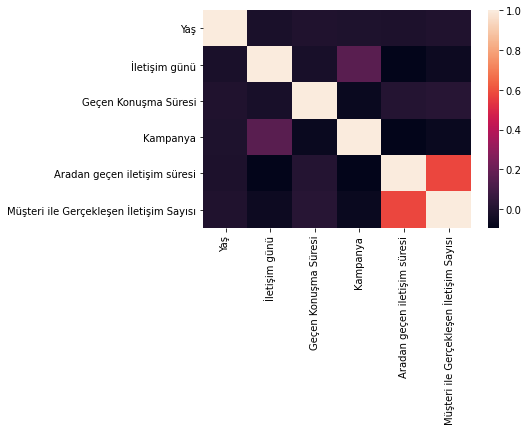

In [32]:
sns.heatmap(data.corr())

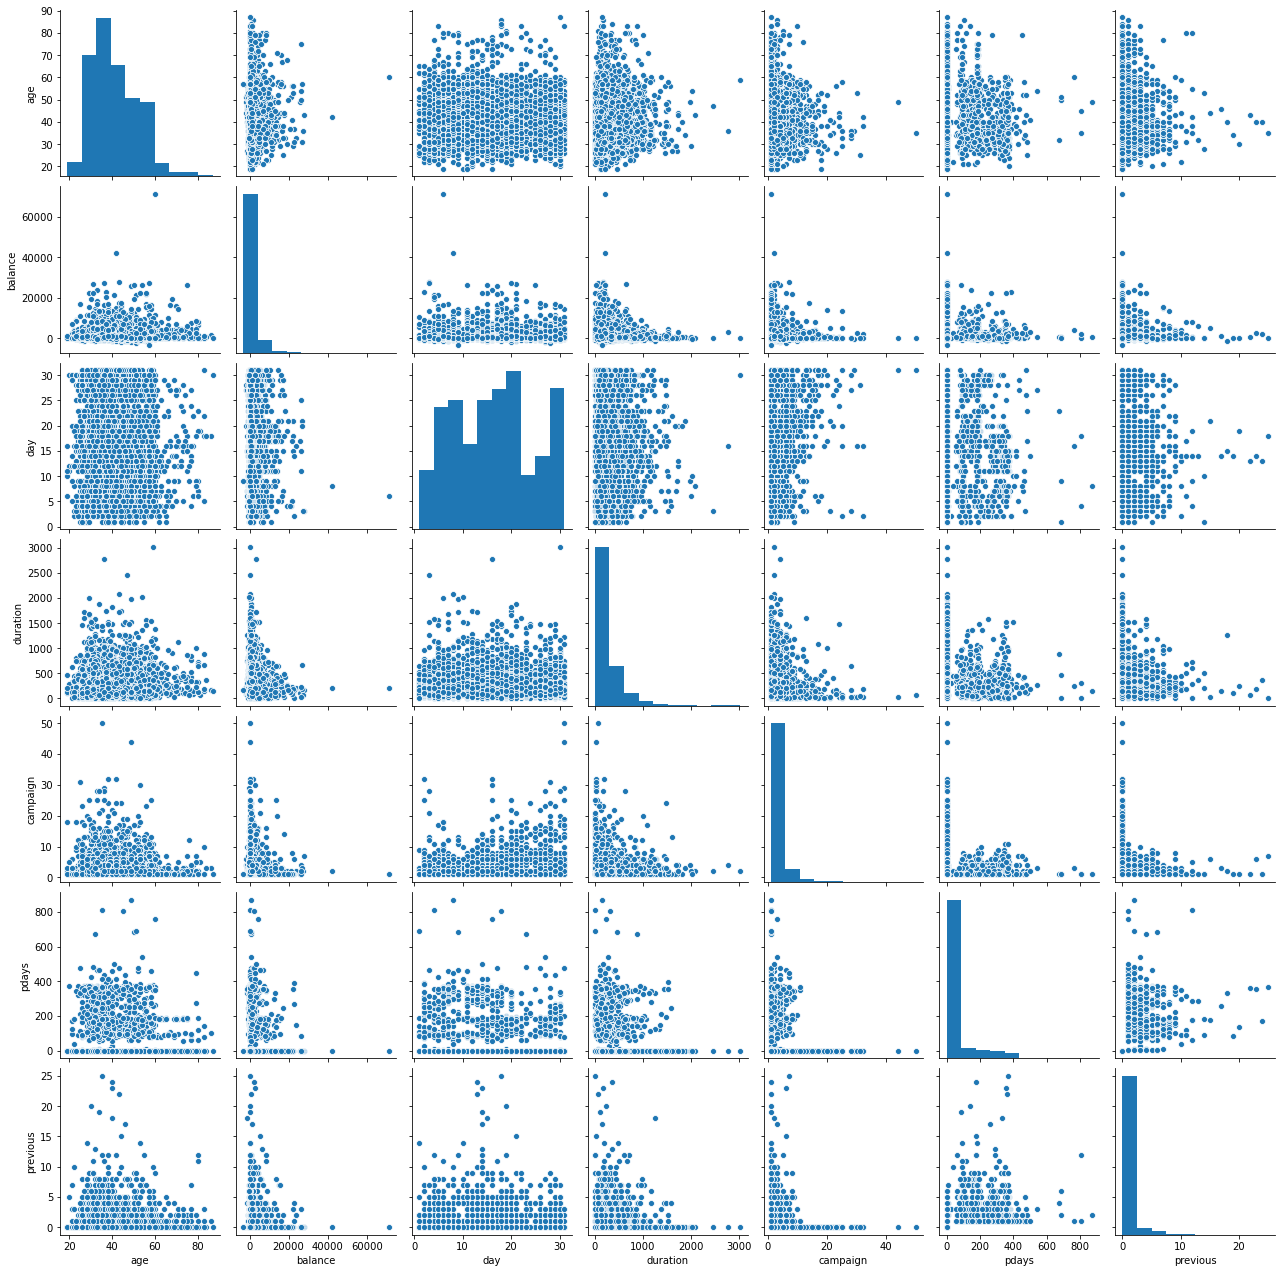

In [44]:
sns.pairplot(data)

### Label - One Hot

In [13]:
data.select_dtypes(include = ("object"))

,İş,Medeni Durum,Öğrenim Durumu,kredi durumu,Konut kredisi,Kişisel kredi,iletişim,Son iletişim ayı,Kampanya Sonucu,Abonelik Durumu
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data["kredi durumu"] = le.fit_transform(data["kredi durumu"])
data["Konut kredisi"] = le.fit_transform(data["Konut kredisi"])
data["Kişisel kredi"] = le.fit_transform(data["Kişisel kredi"])
data["Abonelik Durumu"] = le.fit_transform(data["Abonelik Durumu"])
data["İş"] = le.fit_transform(data["İş"])
data["Medeni Durum"] = le.fit_transform(data["Medeni Durum"])
data["Öğrenim Durumu"] = le.fit_transform(data["Öğrenim Durumu"])
data["iletişim"] = le.fit_transform(data["iletişim"])
data["Kampanya Sonucu"] = le.fit_transform(data["Kampanya Sonucu"])

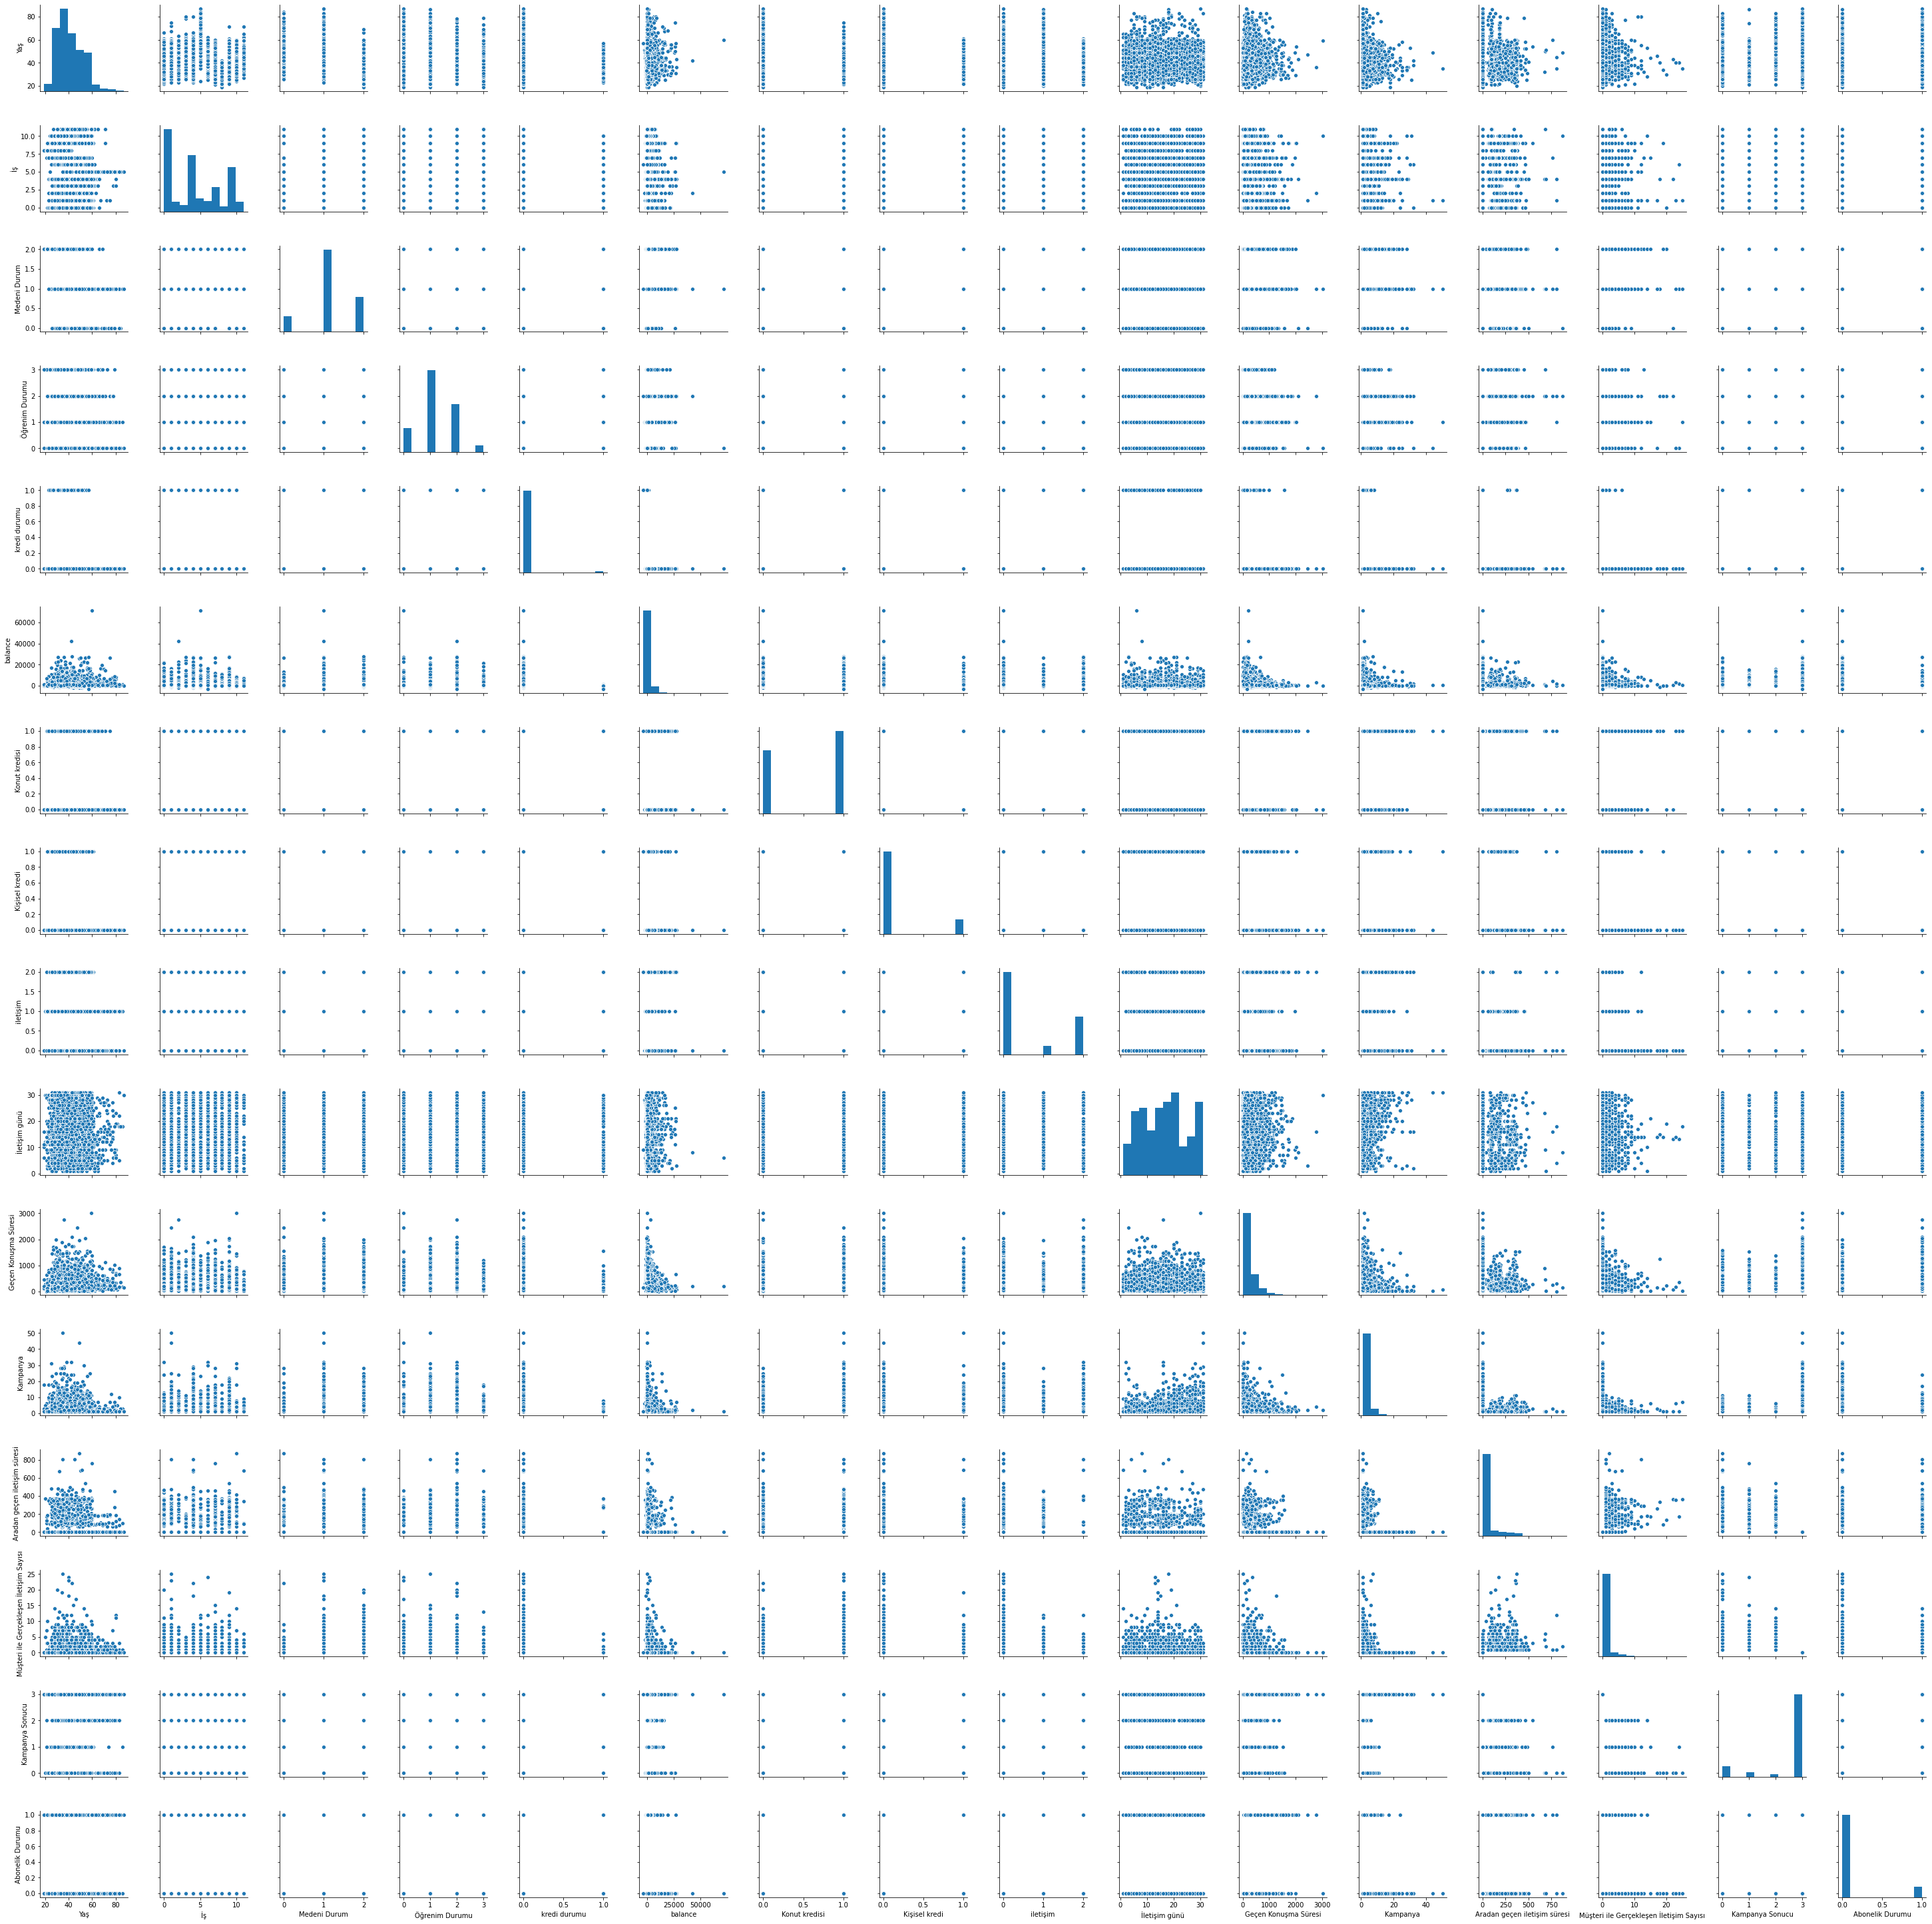

In [52]:
sns.pairplot(data)

In [18]:
data.head()

,Yaş,İş,Medeni Durum,Öğrenim Durumu,kredi durumu,Konut kredisi,Kişisel kredi,iletişim,İletişim günü,Son iletişim ayı,Geçen Konuşma Süresi,Kampanya,Aradan geçen iletişim süresi,Müşteri ile Gerçekleşen İletişim Sayısı,Kampanya Sonucu,Abonelik Durumu
0,30,10,1,0,0,0,0,0,19,oct,79,1,-1,0,3,0
1,33,7,1,1,0,1,1,0,11,may,220,1,339,4,0,0
2,35,4,2,2,0,1,0,0,16,apr,185,1,330,1,0,0
3,30,4,1,2,0,1,1,2,3,jun,199,4,-1,0,3,0
4,59,1,1,1,0,1,0,2,5,may,226,1,-1,0,3,0


In [19]:
data.drop(['İletişim günü' , "Son iletişim ayı" , "Geçen Konuşma Süresi" , "Aradan geçen iletişim süresi"] , axis=1 , inplace=True)

In [20]:
data.head()

,Yaş,İş,Medeni Durum,Öğrenim Durumu,kredi durumu,Konut kredisi,Kişisel kredi,iletişim,Kampanya,Müşteri ile Gerçekleşen İletişim Sayısı,Kampanya Sonucu,Abonelik Durumu
0,30,10,1,0,0,0,0,0,1,0,3,0
1,33,7,1,1,0,1,1,0,1,4,0,0
2,35,4,2,2,0,1,0,0,1,1,0,0
3,30,4,1,2,0,1,1,2,4,0,3,0
4,59,1,1,1,0,1,0,2,1,0,3,0


### Model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [34]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score

In [35]:
y = data["Abonelik Durumu"]
X = data.drop(["Abonelik Durumu"] , axis=1)
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [36]:
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cbc = CatBoostClassifier()

In [37]:
gbc = gbc.fit(x_train , y_train)
y_pred = gbc.predict(x_test)
accuracy_score(y_test , y_pred)

0.8987935656836461

In [38]:
knn = knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test , y_pred)

0.886058981233244

In [39]:
nb = nb.fit(x_train , y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test , y_pred)

0.8424932975871313

In [40]:
rfc = rfc.fit(x_train , y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test , y_pred)

0.8900804289544236

In [41]:
xgb = xgb.fit(x_train , y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test , y_pred)

C:\Users\Mehmet Ali\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.881367292225201

In [42]:
lgbm = lgbm.fit(x_train , y_train)
y_pred = lgbm.predict(x_test)
accuracy_score(y_test , y_pred)

0.8887399463806971

In [43]:
cbc = cbc.fit(x_train , y_train)
y_pred = cbc.predict(x_test)
accuracy_score(y_test , y_pred)

Learning rate set to 0.016537
0:	learn: 0.6796470	total: 196ms	remaining: 3m 16s
1:	learn: 0.6662477	total: 201ms	remaining: 1m 40s
2:	learn: 0.6536042	total: 205ms	remaining: 1m 8s
3:	learn: 0.6409823	total: 209ms	remaining: 52.1s
4:	learn: 0.6290315	total: 214ms	remaining: 42.7s
5:	learn: 0.6178939	total: 219ms	remaining: 36.2s
6:	learn: 0.6067376	total: 223ms	remaining: 31.6s
7:	learn: 0.5964647	total: 227ms	remaining: 28.1s
8:	learn: 0.5863205	total: 231ms	remaining: 25.4s
9:	learn: 0.5771948	total: 235ms	remaining: 23.3s
10:	learn: 0.5679019	total: 239ms	remaining: 21.5s
11:	learn: 0.5597717	total: 242ms	remaining: 20s
12:	learn: 0.5505400	total: 246ms	remaining: 18.7s
13:	learn: 0.5422940	total: 249ms	remaining: 17.5s
14:	learn: 0.5349572	total: 252ms	remaining: 16.5s
15:	learn: 0.5274571	total: 255ms	remaining: 15.7s
16:	learn: 0.5196711	total: 259ms	remaining: 15s
17:	learn: 0.5131069	total: 262ms	remaining: 14.3s
18:	learn: 0.5057696	total: 265ms	remaining: 13.7s
19:	learn: 0.

0.8974530831099196

In [44]:
modeller = [
    gbc,
    knn,
    nb,
    rfc,
    xgb,
    lgbm,
    cbc,    
]
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk =accuracy_score(y_test , y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
GradientBoostingClassifier:
Accuracy: 89.8794%
----------------------------
KNeighborsClassifier:
Accuracy: 88.6059%
----------------------------
GaussianNB:
Accuracy: 84.2493%
----------------------------
RandomForestClassifier:
Accuracy: 89.0080%
----------------------------
XGBClassifier:
Accuracy: 88.1367%
----------------------------
LGBMClassifier:
Accuracy: 88.8740%
----------------------------
CatBoostClassifier:
Accuracy: 89.7453%
